# Bank marketing dataset analysis

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Input variables:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('data.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
df.shape

(41188, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Preprocessing the data

1.Missing value handling

In [7]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Outlier Detection and Handling

In [8]:
for column in df.columns:
    print(column,df[column].nunique())

age 78
job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
duration 1544
campaign 42
pdays 27
previous 8
poutcome 3
emp.var.rate 10
cons.price.idx 26
cons.conf.idx 26
euribor3m 316
nr.employed 11
y 2


No feature with only one value

In [9]:
a=df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome','y'],axis=1)

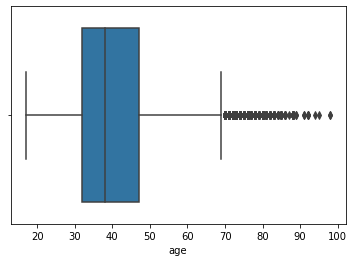

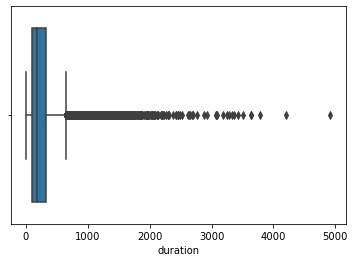

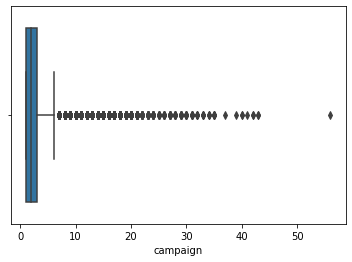

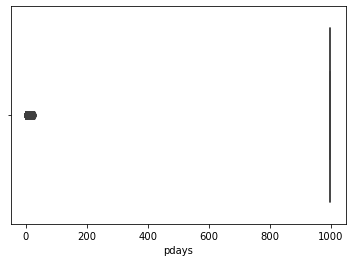

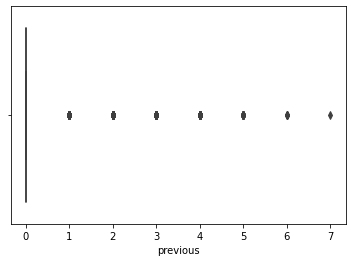

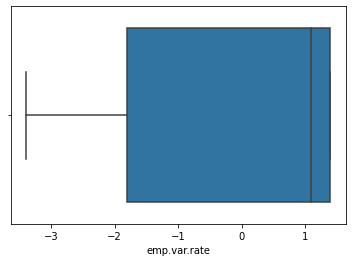

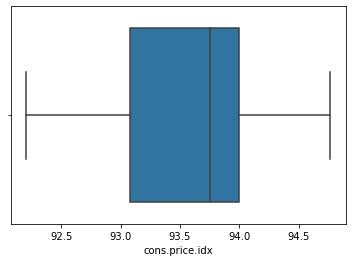

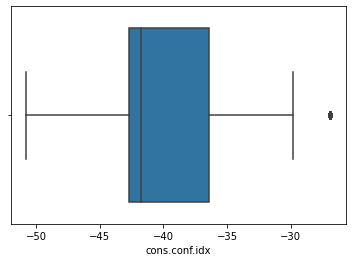

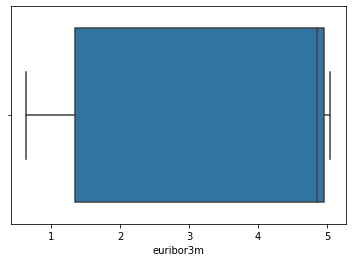

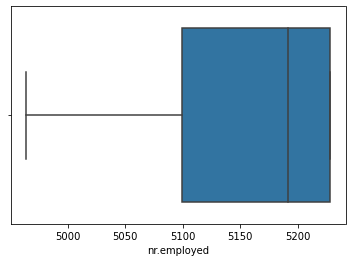

In [10]:
import warnings
warnings.filterwarnings('ignore')
for i in a:
    sns.boxplot(df[i])
    plt.show()

we found age,duration,campaign have outliers

# Removing Outlier

In [11]:
def remove_outliers(data, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), 
                          col_values.mean(), col_values)
    return data

In [13]:
min_val = df["duration"].min()
max_val = 1500
data = remove_outliers(data=df, column='duration' , minimum=min_val, maximum=max_val)

min_val = df["age"].min()
max_val = 80
data = remove_outliers(data=df, column='age' , minimum=min_val, maximum=max_val)

min_val = df["campaign"].min()
max_val = 6
data = remove_outliers(data=df, column='campaign' , minimum=min_val, maximum=max_val)

In [14]:
a=a.drop(['pdays','previous','emp.var.rate',
          'cons.price.idx','cons.conf.idx','euribor3m','nr.employed'],axis=1)

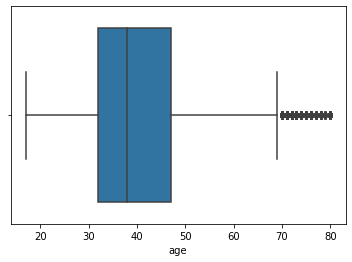

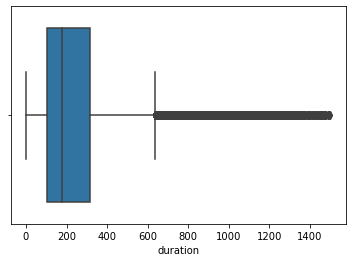

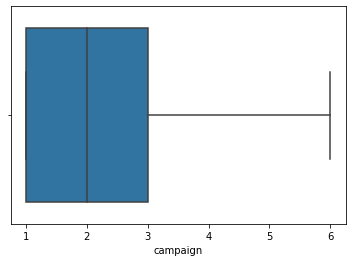

In [15]:
for i in a:
    sns.boxplot(df[i])
    plt.show()

# feature reduction

<AxesSubplot:>

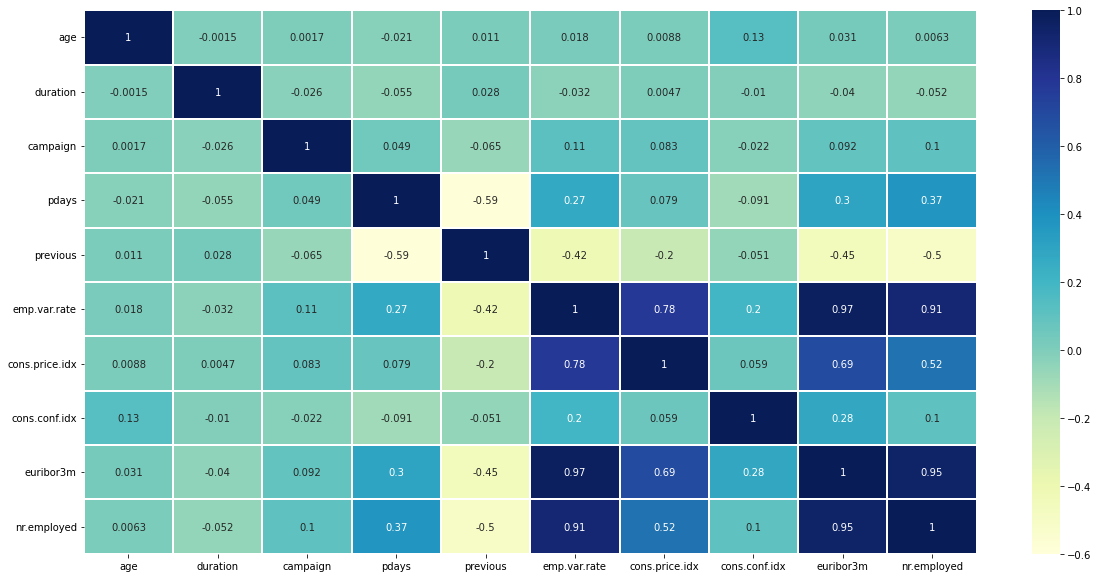

In [16]:
corrmatrix =df.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,vmin=-.6,vmax=1,annot=True,linewidth=.2,cmap='YlGnBu')


from correlation matrix we found that 'emp.var.rate' and' cons.price.idx' has high possitive corelation .so we can drop either one

In [17]:
df.drop('emp.var.rate',axis=1,inplace=True)

similary we can drop 'contact','nr.employed' and 'cons.price.idx'

In [18]:
df.drop(['contact','nr.employed','cons.price.idx'],axis=1,inplace=True)

# handling of unknown values

In [19]:
df.groupby(['y','default']).size()

y    default
no   no         28391
     unknown     8154
     yes            3
yes  no          4197
     unknown      443
dtype: int64

In [20]:
df.groupby(['y','housing']).size()

y    housing
no   no         16596
     unknown      883
     yes        19069
yes  no          2026
     unknown      107
     yes         2507
dtype: int64

In [21]:
df.groupby(['y','loan']).size()

y    loan   
no   no         30100
     unknown      883
     yes         5565
yes  no          3850
     unknown      107
     yes          683
dtype: int64

unknown features does not play imp role

# Encoding(label encoding)

In [23]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


In [24]:
#from sklearn reprocessing we can import label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1=df.copy()
df1['job'] = le.fit_transform(df1['job'])
df1['marital'] = le.fit_transform(df1['marital'])
df1['education'] = le.fit_transform(df1['education'])
df1['default'] = le.fit_transform(df1['default'])
df1['housing'] = le.fit_transform(df1['housing'])
df1['month'] = le.fit_transform(df1['month'])
df1['loan'] = le.fit_transform(df1['loan'])
df1['day_of_week'] = le.fit_transform(df1['day_of_week'])
df1['poutcome'] = le.fit_transform(df1['poutcome'])
df1['y'] = le.fit_transform(df1['y'])
df.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.conf.idx,euribor3m,y
0,56.0,housemaid,married,basic.4y,no,no,no,may,mon,261.0,1.0,999,0,nonexistent,-36.4,4.857,no
1,57.0,services,married,high.school,unknown,no,no,may,mon,149.0,1.0,999,0,nonexistent,-36.4,4.857,no
2,37.0,services,married,high.school,no,yes,no,may,mon,226.0,1.0,999,0,nonexistent,-36.4,4.857,no
3,40.0,admin.,married,basic.6y,no,no,no,may,mon,151.0,1.0,999,0,nonexistent,-36.4,4.857,no
4,56.0,services,married,high.school,no,no,yes,may,mon,307.0,1.0,999,0,nonexistent,-36.4,4.857,no


# feature Engineering


# Exploratory Data Analysis

In [25]:
#1.understanding the data->done
#2.cleaning the data->done
#3.Relationship analysis
#4.data exploration

In [26]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.conf.idx,euribor3m,y
count,41188.000000,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,36548
mean,39.894189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.793841,2.074770,962.475454,0.172963,NaN,-40.502600,3.621291,NaN
std,10.134562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226.368656,1.248369,186.910907,0.494901,NaN,4.628198,1.734447,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-50.800000,0.634000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-42.700000,1.344000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,-41.800000,4.857000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,315.000000,3.000000,999.000000,0.000000,NaN,-36.400000,4.961000,NaN


# Univariate

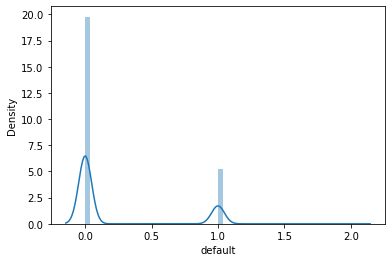

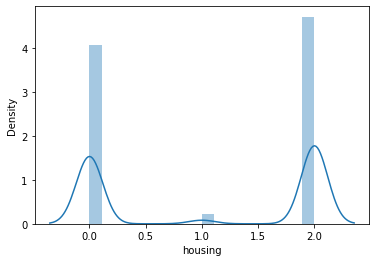

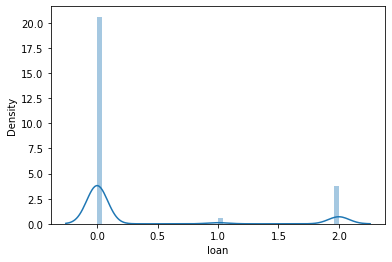

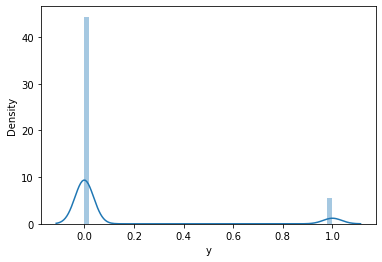

In [27]:
#histogram
b=df1[['default','housing','loan','y']]
for i in b:
    sns.distplot(df1[i])
    plt.show()

# bivariate

As of our dataset we can checK categorical-categorical and Numerical-categorical Analysis

In [28]:
#categorical-categorical
pd.crosstab(df['job'],df['y'])

y,no,yes
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


<AxesSubplot:xlabel='job'>

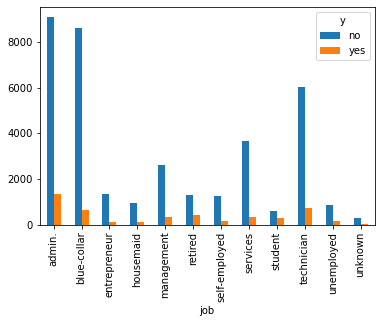

In [29]:
pd.crosstab(df['job'],df['y']).plot(kind='bar')

In [30]:
df.groupby(['y']).count()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.conf.idx,euribor3m
y,,,,,,,,,,,,,,,,
no,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548
yes,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640


In [31]:
df.groupby(['y']).size()

y
no     36548
yes     4640
dtype: int64

# Visualistion categorical-Numerical

In [32]:
df_mean=df.groupby(['y']).mean().reset_index()
df_mean

,y,age,duration,campaign,pdays,previous,cons.conf.idx,euribor3m
0,no,39.837568,217.127803,2.098080,984.113878,0.132374,-40.593097,3.811491
1,yes,40.340177,507.095208,1.891164,792.035560,0.492672,-39.789784,2.123135


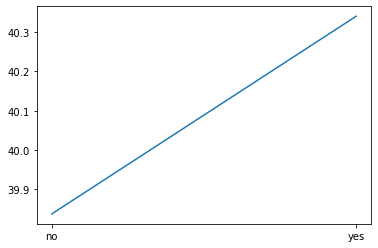

In [33]:
plt.plot(df_mean['y'],df_mean['age'])

# statistical Analysis

1.is job based on education

In [34]:
pd.crosstab(df.job, df.education)

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123
retired,597,75,145,276,3,241,285,98
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,218,173,150
student,26,13,99,357,0,43,170,167


In [35]:
import scipy.stats as stats
ct = pd.crosstab(df.job, df.education)
stat,p,dof,expected=stats.chi2_contingency(ct)
print(f'chisquare value:{stat}')
print(f'p value:{p}')
print(f'degree of freedom:{dof}')
print(f'expected values:{expected}')

chisquare value:37338.1351562161
p value:0.0
degree of freedom:77
expected values:[[1.05667359e+03 5.79955909e+02 1.52959576e+03 2.40762674e+03
  4.55462756e+00 1.32666179e+03 3.07892823e+03 4.38003350e+02]
 [9.38251530e+02 5.14959891e+02 1.35817301e+03 2.13780252e+03
  4.04418763e+00 1.17798199e+03 2.73387084e+03 3.88916044e+02]
 [1.47622026e+02 8.10224337e+01 2.13691366e+02 3.36356220e+02
  6.36301835e-01 1.85340585e+02 4.30140041e+02 6.11910265e+01]
 [1.07472079e+02 5.89861125e+01 1.55572011e+02 2.44874721e+02
  4.63241721e-01 1.34932019e+02 3.13151403e+02 4.45484122e+01]
 [2.96460717e+02 1.62712635e+02 4.29143925e+02 6.75484607e+02
  1.27784792e+00 3.72208702e+02 8.63825192e+02 1.22886375e+02]
 [1.74388657e+02 9.57133146e+01 2.52437603e+02 3.97343887e+02
  7.51675245e-01 2.18946295e+02 5.08132466e+02 7.22861027e+01]
 [1.44073419e+02 7.90747791e+01 2.08554555e+02 3.28270734e+02
  6.21006118e-01 1.80885282e+02 4.19800136e+02 5.97200884e+01]
 [4.02411965e+02 2.20864038e+02 5.82514446e

2.whethere bank loans having same for the respondants

In [36]:
from scipy.stats import f_oneway
f_oneway(df1['default'],df1['housing'],df1['loan'])

F_onewayResult(statistic=16284.757434751442, pvalue=0.0)

3.is there any dependency b/w age and term deposit

In [37]:
no_data=df[df['y']=='no']
yes_data=df[df['y']=='yes']

In [38]:
from statsmodels.stats.weightstats import ztest as ztest
ztest(no_data['age'],yes_data['age'])

(-3.1825726544548787, 0.0014597288735704623)

# Modelling

Split Dataset into Training set and Test set

In [39]:
X=df1.drop(['y'],axis=1)
y=df1[['y']]

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
pred=rf.predict(X_test)

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.64      0.50      0.56       935

    accuracy                           0.91      8238
   macro avg       0.79      0.73      0.76      8238
weighted avg       0.90      0.91      0.91      8238



In [47]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
confusion_matrix(y_test,pred)

array([[7034,  269],
       [ 465,  470]], dtype=int64)

# decision tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred=dt.predict(X_test)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7303
           1       0.50      0.53      0.52       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238



# Model Fine Tuning

In [50]:
pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)*100

duration         31.188014
euribor3m        16.323018
age               9.567113
cons.conf.idx     5.807696
job               4.874451
day_of_week       4.240397
education         4.202307
pdays             4.140725
campaign          4.020465
poutcome          3.816263
month             3.726886
marital           2.230023
housing           2.071479
loan              1.509036
previous          1.428744
default           0.853383
dtype: float64

# standardisation

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [52]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7303
           1       0.66      0.48      0.55       935

    accuracy                           0.91      8238
   macro avg       0.80      0.72      0.75      8238
weighted avg       0.90      0.91      0.91      8238



In [53]:
confusion_matrix(y_test,pred)

array([[7068,  235],
       [ 487,  448]], dtype=int64)

# Fine Tuning of Hyperparameter

In [54]:
rf.fit(X_train,y_train)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [55]:
rft=RandomForestClassifier(n_estimators=500,max_depth=1000,random_state=42,criterion='gini')
rft.fit(X_train,y_train)

RandomForestClassifier(max_depth=1000, n_estimators=500, random_state=42)

In [56]:
pred=rft.predict(X_test)
f1_score(y_test,pred)

0.5758133824432167